# Appendix G.2 Vienna General Hospital physical comparison calculations

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from process_improvement import xmr_charts as xmr
from process_improvement import comparison_charts as cc

%matplotlib inline

## Step 1. Gather the data

In [2]:
# Get data
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Vienna url
rates_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/physical-comparison-death-to-birth-rates.csv'
# Vienna General dataset url
rates_df = get_data(rates_url)

# Show first 10 lines of rates_df
rates_df.head(10)

# Show columns
rates_df.columns

Index(['Hospital', 'Year', 'Births', 'Deaths', 'Rate', 'Note'], dtype='object')

### Drop  unnecessary columns from dataframe

In [3]:
rates_df = rates_df[['Hospital', 
           'Year', 
           #'Births', 
           #'Deaths', 
           'Rate', 
           #'Note'
          ]]

# Make 'Year' column dtype string
rates_df['Year'] = rates_df['Year'].astype('string')

# Show dataframe dtypes
rates_df.dtypes

Hospital     object
Year         string
Rate        float64
dtype: object

### Splite dataframe according to stage

In [4]:
dublin_df = rates_df[rates_df['Hospital'] == 'Dublin Maternity Hospital'].copy()
vienna_df = rates_df[rates_df['Hospital'] == 'Vienna General Hospital'].reset_index(drop=True)

## Step 2. Calculate the moving ranges

In [5]:
# Calculate the moving ranges for before_df
vienna_df['Moving Ranges'] = abs(vienna_df['Rate'].diff())
vienna_df

,Hospital,Year,Rate,Moving Ranges
0,Vienna General Hospital,1784,2.1,NaN
1,Vienna General Hospital,1785,1.4,0.7
2,Vienna General Hospital,1786,0.4,1.0
3,Vienna General Hospital,1787,0.4,0.0
4,Vienna General Hospital,1788,0.4,0.0
5,Vienna General Hospital,1789,0.6,0.2
6,Vienna General Hospital,1790,0.8,0.2
7,Vienna General Hospital,1791,0.6,0.2
8,Vienna General Hospital,1792,0.9,0.3
9,Vienna General Hospital,1793,2.6,1.7


## Step 3. Calculate the average moving range

In [8]:
# Calculate the average moving range for before_df['Moving Ranges']
vienna_ave_mR = round(vienna_df['Moving Ranges'].mean(),2)
vienna_ave_mR

1.49

## Step 4. Calculate the mean

In [9]:
# Calculate the mean before_df['Rate']
vienna_mean = round(vienna_df['Rate'].mean(),2)
vienna_mean

2.66

## Step 5. Calculate the process limits

In [10]:
# Upper Process Limit (UPL)
vienna_UPL = round(vienna_mean + (2.660*vienna_ave_mR),2)
# Lower Process Limit (LPL)
vienna_LPL = round(vienna_mean - (2.660*vienna_ave_mR),2)
# Upper Process Limit (UPL)
vienna_URL = round(3.268*vienna_ave_mR,2)
# Show results
print('UPL:', vienna_UPL)
print('LPL:', vienna_LPL)
print('URL:', vienna_URL)

UPL: 6.62
LPL: -1.3
URL: 4.87


## Step 6. Put it all together

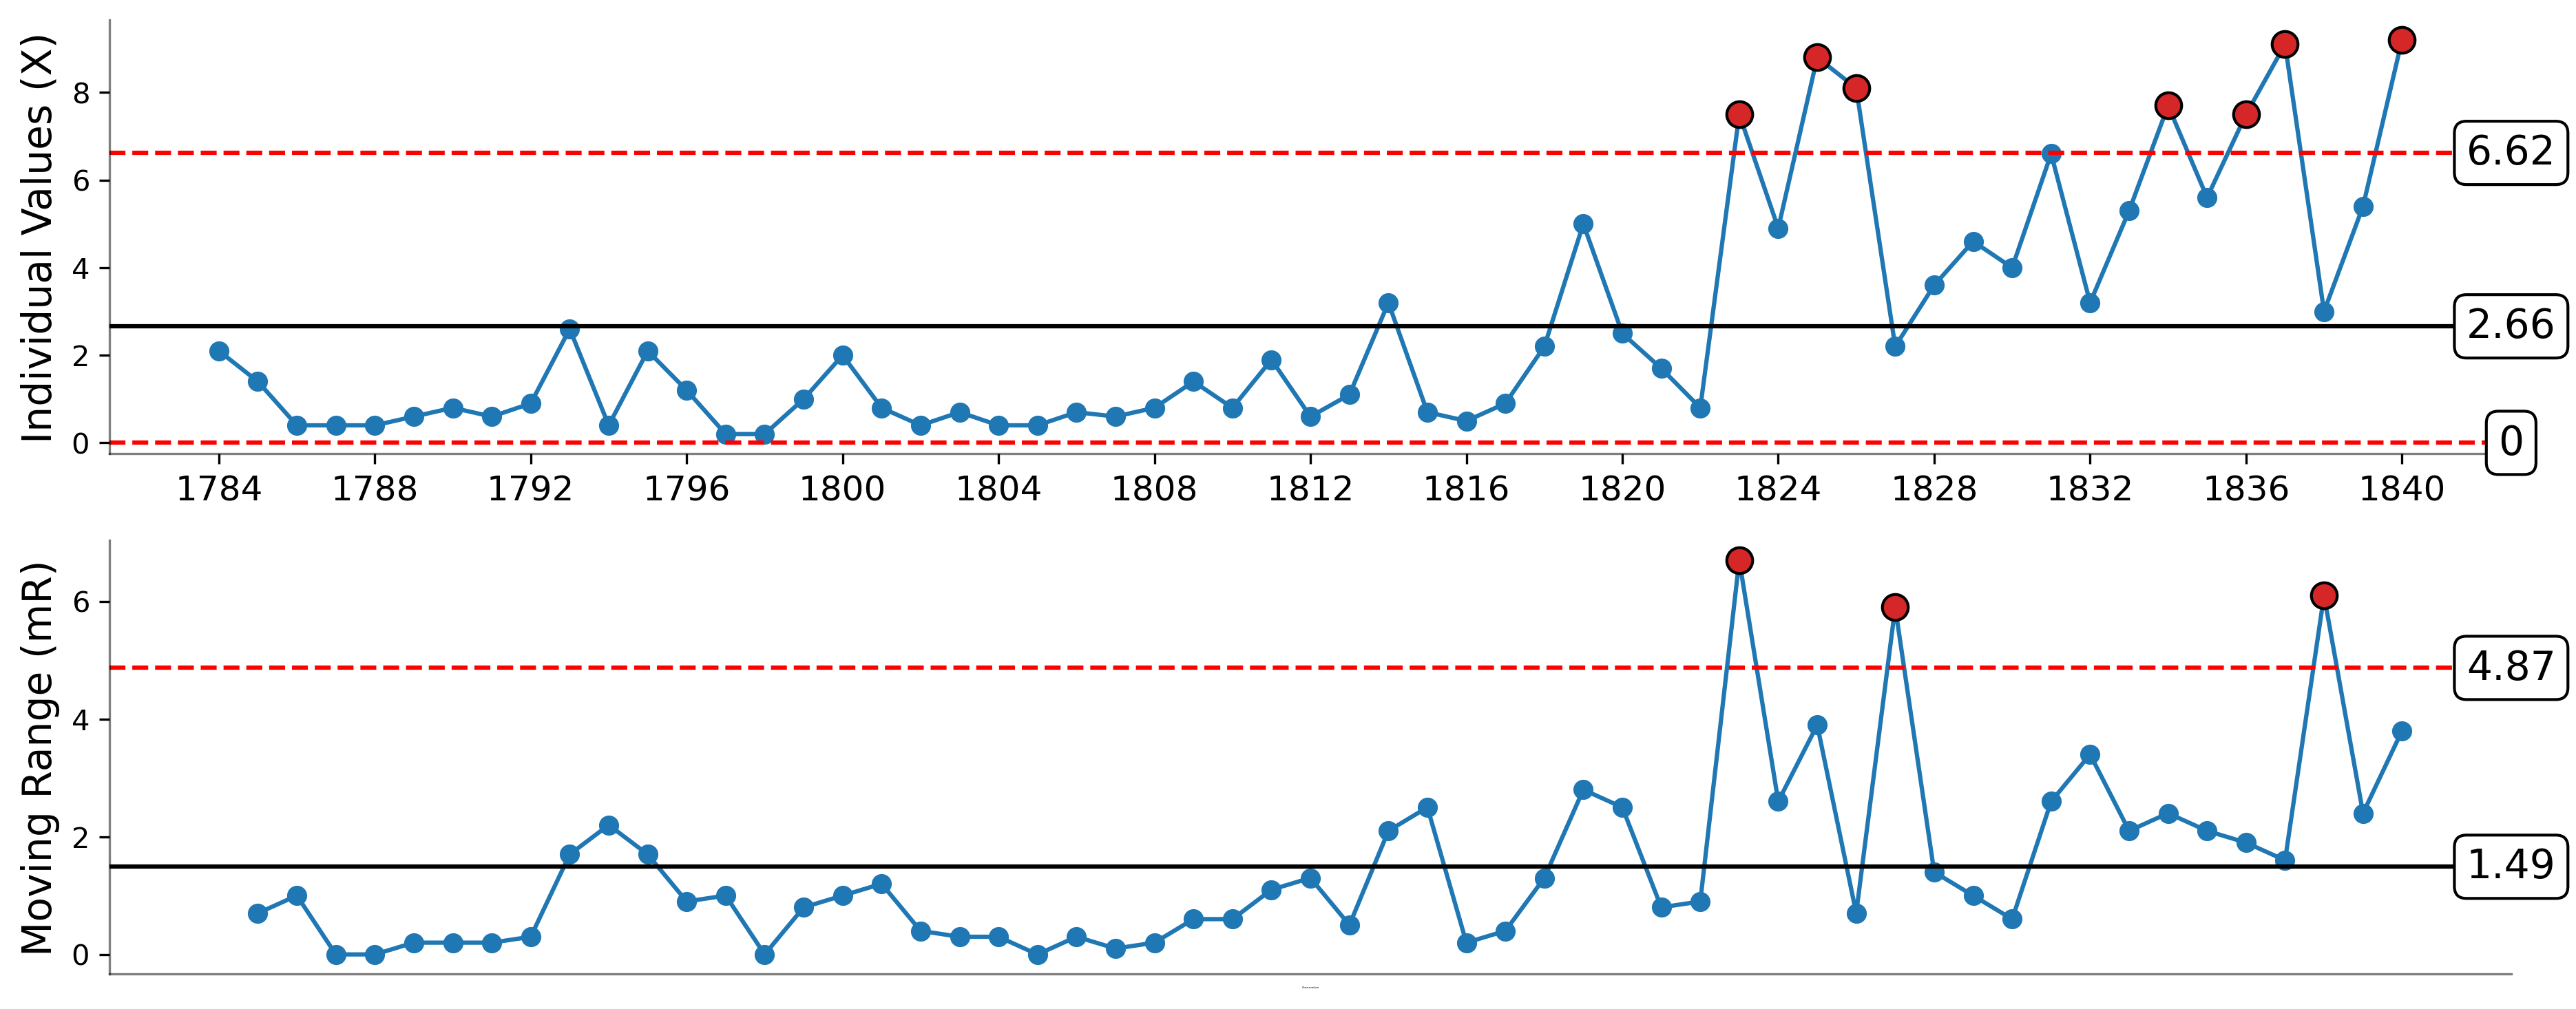

In [11]:
vienna_results = xmr.xmr_chart(vienna_df,
                                'Rate',
                                'Year',
                                tickinterval=4, 
                                round_value=2, 
                                label_fontsize=14,
                                xtick_fontsize=12)